<center> <h1>TSIA2 Data Analysis (Shareable)</h1>

**All personally identifible data has been removed from the data set are replaced with random names or values.**

<p float="center">
  <img src=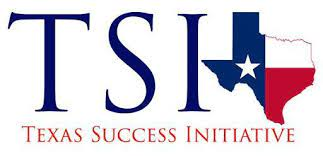 width="200" />

  <img src="https://resources.finalsite.net/images/f_auto,q_auto/v1588075884/austinachieveorg/yyrk9hzs9zvksxzpzwkj/AustinAchieveLogo_ColorCorrected.eps" width="300"/>
</p></center>



---

**Analysis by:** Wyatte C. Hooper

**Analysis on:** November 21, 2023

# Analysis Report

<h2>Table of Context</h2>

---


1. TSIA2 Exam Details
2. Loading and Cleaning the Data
3. Descriptive Analysis
4. Missing Scores
5. Passing Scores
6. Score Distribution
7. Scores by Objective
8. Conclusion



## 1) TSIA2 Exam Details
---

<h2> TSIA2 Information </h2>
The Texas Assessment Initiative Assessment 2.0 (TSIA2)
is the assessment instrument used to determine college
readiness for non-exempt high school students, as required by the
Texas Success Initiative. TSIA2 helps determine whether
you’re ready for college-level coursework in English
language arts and reading (ELAR) and mathematics.

The tests in TSIA2 either certify you as “college ready” in a subject area or provide a diagnostic profile regarding your academic strengths and weaknesses so that targeted instruction may be provided to help you succeed in college-level courses. TSIA2 contains multiple-choice questions aligned to Texas College and Career Readiness Standards, Texas Essential
Knowledge and Skills, Adult Education and Literacy Content Standards 2.0, and National Reporting System Educational Functioning Levels. The ELAR Test also contains an essay component you must complete to be considered college ready in ELAR. Here are more details about TSIA2:

* Multiple-choice tests in TSIA2 are computer adaptive,
which means that questions increase or decrease in
difficulty depending on how you respond.

* The assessments are untimed, which means there’s no
time limit on how long you can take to complete testing.

* In most cases, TSIA2 provides results upon completion. When you complete the assessment, you immediately receive a score report.

*  The “save and finish later” option lets you stop at certain times during your test session. If you select this option, you must return and complete the remaining assessment within 14 calendar days. This option isn’t available for the TSIA2 Essay Test, which must be started and completed in the same session.

**Passing Scores**
* Students need to score a 945 on the ELAR exam or a 5 on the ELAR Diagnostic to pass.
* Students need a 5 on the essay to pass.
* Students need to score a 950 on the Math exam or a 6 on the Math Diagnostic.


<h3>Testing at Achieve</h3>

Students taking TSIA2 at Achieve usually do so over two four hour days.  On the first day students take a 30 question multible choice test on ELAR.  If they do not pass then they are taken to a 48 question multible choice diagnostic test for ELAR. Then students complete the Essay portion of the exam.  

On the second day students take a 20 question multible choice test for math.  If students do not pass then they take a 48 question diagnostic test for math.


<h2>Key Questions:</h2>

* How many scholars are missing one or more sections?
* How many scholars have passed each section?
* How have the different grade levels preformed on the sections?
* In the diagnostic test, what objectives are scholars preforming well in? What objectives are scholars struggling in?
* How many scholars have failed the first multible choice test, but passed the diagnostic?


## 2) Load and Clean Data
---

In [ ]:
#Libraries used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn3, venn3_circles

#Access File Stored in Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loads File from MyDrive
df = pd.read_csv('/content/drive/MyDrive/Achieve/TSI2/November2023/Shareable/TSIA2DataSharable.csv')

#Changes ID columns to type string
df['SR ID'] = df['SR ID'].astype(str)
df['TSDS'] = df['TSDS'].astype(str)

**Shape**

We will start to make sure everything loaded right by grabbing the number of rows and columns in our data set.  We will also be able to use these values later in the analysis.

In [ ]:
#Gets the number of rows and columns in the dataset
rows = df.shape[0]
columns = df.shape[1]
print(f'There are {rows} scholars in the dataset and {columns} data points per a scholar.')

There are 615 scholars in the dataset and 16 data points per a scholar.


**Data Types**

Now we want to check the type of each variable and how many non-null entries each variable has.

In [ ]:
#prints info on the varibles in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 16 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   SR ID                                                 615 non-null    object 
 1   TSDS                                                  615 non-null    object 
 2   First                                                 615 non-null    object 
 3   Last                                                  615 non-null    object 
 4   Grade                                                 615 non-null    int64  
 5   ELAR                                                  585 non-null    float64
 6   ELAR Diagnostic                                       511 non-null    float64
 7   ELAR -Text Analysis and Synthesis                     511 non-null    object 
 8   ELAR - Content Revision and Editing for Conventions.  511 no

**Observations:**
* There are no null values in SR ID, TSDS, First, Last, and Grade.
* Every variable has atleast 80% non null values except Essay which has 60.5% (372/615) non-null values.

**Quick Check**

By printing off the first five rows, we can do a quick check to make sure everything looks right.  As we can see the columns are labeled properly and the data looks like we would expect it to.

In [ ]:
#prints first five rows
df.head()

,SR ID,TSDS,First,Last,Grade,ELAR,ELAR Diagnostic,ELAR -Text Analysis and Synthesis,ELAR - Content Revision and Editing for Conventions.,Essay,Math,Math Diagnostic,Math - Quantitative Reasoning,Math - Algebraic Reasoning,Math - Geometric and Spatial Reasoning,Math - Probabilistic and Statistical Reasoning
0,1,1,Troy,Coleman,12,926.0,3.0,1-Basic,1-Basic,4.0,921.0,3.0,2-Proficient,1-Basic,1-Basic,1-Basic
1,2,2,Freddy,Ponce,12,940.0,4.0,2-Proficient,2-Proficient,4.0,938.0,5.0,1-Basic,1-Basic,2-Proficient,2-Proficient
2,3,3,Victor,Ingram,12,944.0,5.0,3-Advanced,3-Advanced,5.0,953.0,NaN,NaN,NaN,NaN,NaN
3,4,4,Halima,Cervantes,12,940.0,5.0,3-Advanced,2-Proficient,5.0,950.0,4.0,1-Basic,1-Basic,1-Basic,1-Basic
4,5,5,Edgar,Bright,12,937.0,4.0,2-Proficient,2-Proficient,5.0,933.0,4.0,2-Proficient,1-Basic,1-Basic,1-Basic


## 3) Discriptive Student Data

Our goal for this section is to describe the student who are in the data set and how scores correlate to each other.

**Statistical Summary**

Printing the statistical summary will give us the summary statistics for the quantitative variables.  This should give us a rough since of the distrabutions.

In [ ]:
#prints statistical summary for all quantitative variables
df.describe()

,Grade,ELAR,ELAR Diagnostic,Essay,Math,Math Diagnostic
count,615.000000,585.000000,511.000000,372.000000,604.000000,566.000000
mean,10.476423,930.793162,2.902153,4.569892,929.937086,3.015901
std,1.115050,14.106734,0.897827,1.264466,14.016078,1.010438
min,9.000000,910.000000,2.000000,0.000000,910.000000,2.000000
25%,9.000000,920.000000,2.000000,4.000000,920.000000,2.000000
50%,11.000000,931.000000,3.000000,5.000000,928.000000,3.000000
75%,11.000000,941.000000,4.000000,5.000000,937.000000,4.000000
max,12.000000,972.000000,5.000000,8.000000,990.000000,6.000000


**Observations:**
* The mean score for ELAR is similar to the median score.
* For ELAR, a passing score is about 1 standard devitation above the mean.
* The median and Q3 value for the Essay is both 5.

**Grade Level Count**

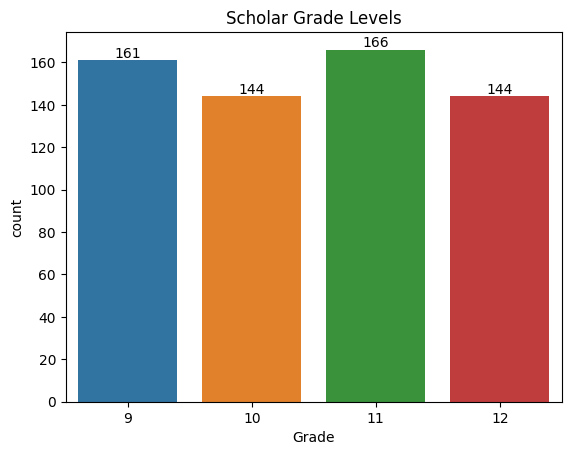

In [ ]:
#Creates a bar graph for the count of scholars in each grade level
GradeLevelCount = sns.countplot(
    data=df,
    x='Grade'
)

#Labels bars with the count
for bar in GradeLevelCount.containers:
  GradeLevelCount.bar_label(bar)

#Titles the bar graph
GradeLevelCount.set_title('Scholar Grade Levels');

**Observations:**
* All grade levels have roughly the same number of scholars in them (between 144 and 166).

**Exam Score Correlations**

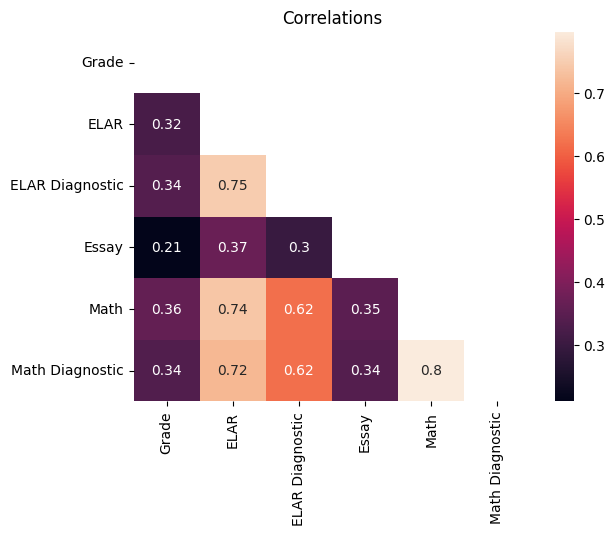

In [ ]:
#Creates a matrix of correlations
correlations = df.corr(numeric_only=True)

#Graphs the correlations on a heatmap
correlationMap = sns.heatmap(
    correlations,
    annot=True,
    mask=np.triu(correlations)
      )

correlationMap.set_title('Correlations');

**Observation**
* The correlations between ELAR and Math (0.74) is signifcantly stronger than the correlation between ELAR and Essay (0.37)
* Essay has a weak positive correlation with every other variable.

Text(0.5, 1.0, 'ELAR Scores by Essay')

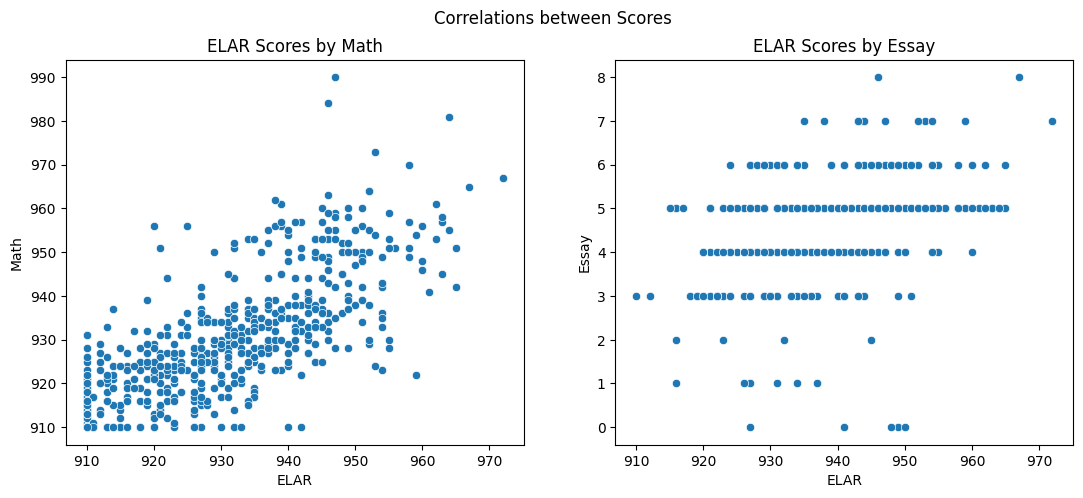

In [ ]:
#Creates a grid for the scatter plots
scatterFig, scatterAx = plt.subplots(1,2, figsize=(13,5))

#Creates scatter plots
ELARByMath = sns.scatterplot(data=df, x='ELAR', y='Math', ax = scatterAx[0])
ELARByEssay = sns.scatterplot(data=df, x='ELAR', y='Essay', ax = scatterAx[1])

#Titles Figure
scatterFig.suptitle('Correlations between Scores')

#Labels plots
scatterAx[0].set_title('ELAR Scores by Math')
scatterAx[1].set_title('ELAR Scores by Essay')

## 4) How Many Missing Scores?

Our goal for this section is to figure how many are missing each part of the exam and what grade level the missing scores are from.

### a) Missing Score Counts
Below we are going to look at how many scholars are missing a score for each section of the TSIA2.  This could be caused by incomplete data or them not finishing the section of the exam.

**Missing ELAR**

In [ ]:
#Creates a dataframe for scholars who are missing ELAR
missingELAR = df.loc[df['ELAR'].isnull()]

#Counts the scholars who are missing ELAR
missingELARCount = len(missingELAR)

#Saves the dataframe as a csv file
missingELAR.to_csv('/content/drive/MyDrive/Achieve/TSI2/November2023/scholarsMissingELAR.csv')

**Missing Math**

In [ ]:
#Creates a dataframe for scholars who are missing Math
missingMath = df.loc[df['Math'].isnull()]

#Counts the scholars who are missing Math
missingMathCount = len(missingMath)

#Saves the dataframe as a csv file
missingMath.to_csv('/content/drive/MyDrive/Achieve/TSI2/November2023/scholarsMissingMath.csv')

**Missing the Essay**

In [ ]:
#Creates a dataframe for scholars who are missing Essay
missingEssay = df.loc[df['Essay'].isnull()]

#Counts the scholars who are missing the Essay
missingEssayCount = len(missingEssay)

#Saves the dataframe as a csv file
missingEssay.to_csv('/content/drive/MyDrive/Achieve/TSI2/November2023/scholarsMissingEssay.csv')

**Missing Two Out of the Three Sections**

In [ ]:
#Merges missingELAR and missingEssay
missingEssayAndELAR = missingELAR.merge(missingEssay, on=list(missingELAR.keys()), how='inner')
missingEssayAndELARCount = len(missingEssayAndELAR)

#Merges missingEssay and missingMath
missingEssayAndMath = missingEssay.merge(missingMath, on=list(missingMath.keys()), how='inner')
missingEssayAndMathCount = len(missingEssayAndMath)

#Merges missingELAR and missingMath
missingELARAndMath = missingELAR.merge(missingMath, on=list(missingELAR.keys()), how='inner')
missingELARAndMathCount=len(missingELARAndMath)

**Missing All Three Sections**

In [ ]:
#Merges to find overlap of all three
missingAll = missingEssayAndELAR.merge(missingMath, on=list(missingEssayAndELAR.keys()), how='inner')
missingAllCount = len(missingAll)

**Venn Diagram Catagories**

In [ ]:
#Counts the number of scholars in each catagory
onlyMissingMath = missingMathCount-missingEssayAndMathCount-missingELARAndMathCount-missingAllCount
onlyMissingELAR = missingELARCount-missingEssayAndELARCount-missingELARAndMathCount-missingAllCount
onlyMissingEssay = missingEssayCount-missingEssayAndELARCount-missingEssayAndMathCount-missingAllCount
missingELARAndEssayOnly = missingEssayAndELARCount-missingAllCount
missingEssayAndMathOnly = missingEssayAndMathCount-missingAllCount
missingELARAndMathOnly = missingELARAndMathCount-missingAllCount

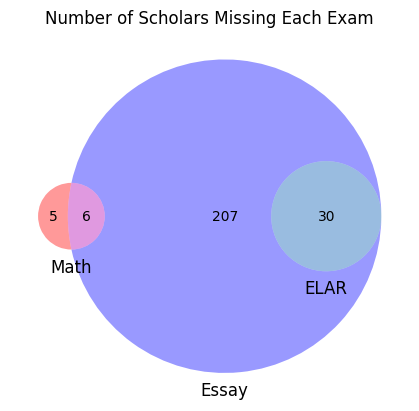

In [ ]:
#Creates a venn diagram for the scholar who are missing a score.
missingCountVenn = venn3(
    subsets = (onlyMissingMath, onlyMissingELAR, missingELARAndMathOnly, onlyMissingEssay, missingEssayAndMathOnly, missingELARAndEssayOnly, missingAllCount),
    set_labels = ('Math', 'ELAR', 'Essay')
    )

plt.title("Number of Scholars Missing Each Exam");

In [ ]:
#Total number of scholars who are missing ELAR, Math or Essay
total = missingAllCount+onlyMissingMath+onlyMissingELAR+onlyMissingEssay+missingELARAndEssayOnly+missingELARAndMathOnly+missingEssayAndMathOnly

#Prints the number of scholars who are missing nothing
print(f'The number of scholars who are missing at least one part of the exam are {total}.')
print(f'The number of scholars who are missing nothing are: {rows-total}')

The number of scholars who are missing at least one part of the exam are 248.
The number of scholars who are missing nothing are: 367


**Observations:**
* 39.5% of scholars (243/615) are missing their Essay score.
* 40.3% of scholars (248/615) are missing atleast one part.
* Every scholar who is missing an ELAR score is also missing their Essay.
* No one is missing both Math and ELAR

### b) Missing Scores by Grade Level
Now we will look at how the missing scores are distributed throughout the grade levels.

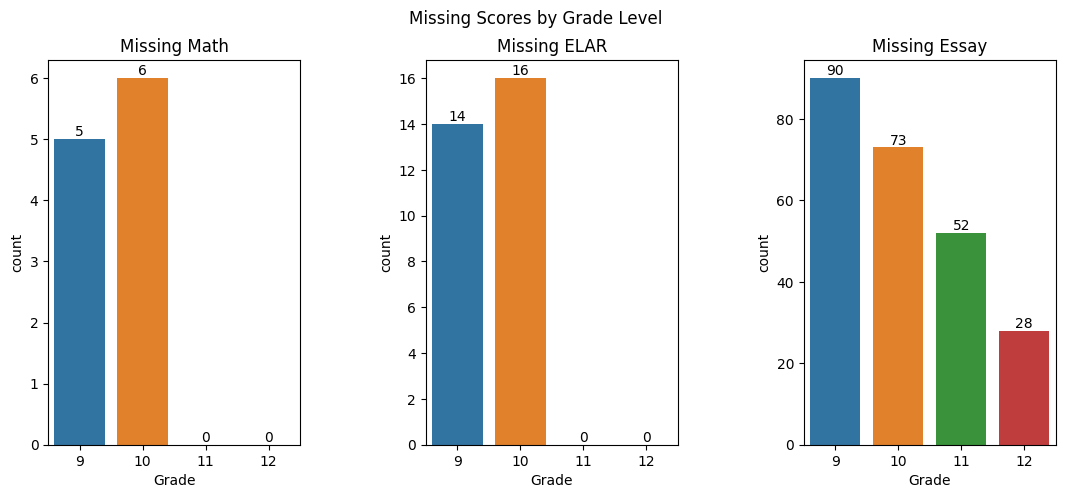

In [ ]:
#Countplot of missing Scores by grade level
missingScoresByGradeFig, missingScoresByGradeAx = plt.subplots(1,3, figsize=(13,5))

#Adjusts the space between the plots
plt.subplots_adjust(wspace=.5)

#Creates each plot
sns.countplot(data=missingMath, x='Grade', ax=missingScoresByGradeAx[0], order = [9, 10, 11, 12])
sns.countplot(data=missingELAR, x='Grade', ax=missingScoresByGradeAx[1], order = [9, 10, 11, 12])
sns.countplot(data=missingEssay, x='Grade', ax=missingScoresByGradeAx[2], order = [9, 10, 11, 12])

#Titles
missingScoresByGradeFig.suptitle('Missing Scores by Grade Level')
missingScoresByGradeAx[0].set_title('Missing Math')
missingScoresByGradeAx[1].set_title('Missing ELAR')
missingScoresByGradeAx[2].set_title('Missing Essay');

#Labels bars with the Count
for plot in missingScoresByGradeAx:
  for bar in plot.containers:
    plot.bar_label(bar)

**Observations:**
* All of the scholars who are missing either Math or ELAR are in 9th or 10th grade.
* There are 28 Seniors and 52 Juniours who are missing an Essay score.

## 5) Passing Score Counts

In this section our goal is to see how many scholars have passed each section of the TSIA2 and how each grade level is preforming.

### a) Passing Scores Count for Each Section Exam

**Passed Math**

In [ ]:
#Creates a dataframe for all scholars who passed math
passedMath = df.loc[(df['Math']>=950) | (df['Math Diagnostic']>= 6)]

#Counts all scholars who passed math
passedMathCount = len(passedMath)

**Passed ELAR**

In [ ]:
#Creates a dataframe for all scholars who passed ELAR
passedELAR = df.loc[(df['ELAR']>=945) | (df['ELAR Diagnostic']>= 5)]

#Counts all scholars who passed ELAR
passedELARCount = len(passedELAR)

**Passed the Essay**

In [ ]:
#Creates a dataframe for all scholars who passed the Essay
passedEssay = df.loc[df['Essay']>= 5]

#Counts all scholars who passed the essay
passedEssayCount = len(passedEssay)

**Passed Two out of the Three Sections**

In [ ]:
#Merges passedMath and passedELAR
passedMathAndELAR = passedMath.merge(passedELAR, on=list(df.keys()), how='inner')
npassedMathAndELAR = len(passedMathAndELAR)

#Merges passedMath and passedEssay
passedMathAndEssay = passedMath.merge(passedEssay, on=list(df.keys()), how='inner')
npassedMathAndEssay = len(passedMathAndEssay)

#Merges passedELAR and passedEssay
passedELARAndEssay = passedELAR.merge(passedEssay, on=list(df.keys()), how='inner')
npassedELARAndEssay = len(passedELARAndEssay)

**Passed all Three Sections**

In [ ]:
#Merges passELARAndEssay and passedMath
passedAll = passedELARAndEssay.merge(passedMath, on = list(df.keys()), how = 'inner')
passedAllCount = len(passedAll)

**Catagories for the Venn Diagram**

In [ ]:
#Counts the number of scholars in each catagory
passedMathAndELAROnly = npassedMathAndELAR-passedAllCount
passedMathAndEssayOnly = npassedMathAndEssay-passedAllCount
passedELARAndEssayOnly = npassedELARAndEssay-passedAllCount
passedMathOnly = passedMathCount-passedMathAndELAROnly-passedMathAndEssayOnly-passedAllCount
passedELAROnly = passedELARCount-passedMathAndELAROnly-passedELARAndEssayOnly-passedAllCount
passedEssayOnly = passedEssayCount - passedMathAndEssayOnly - passedELARAndEssayOnly - passedAllCount

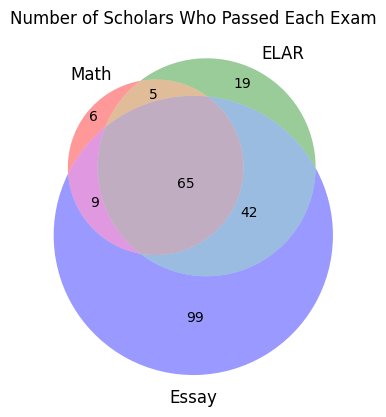

In [ ]:
#Venn Diagram for Passing Scores
passingCountVenn = venn3(
    subsets = (passedMathOnly, passedELAROnly, passedMathAndELAROnly, passedEssayOnly, passedMathAndEssayOnly, passedELARAndEssayOnly, passedAllCount),
    set_labels = ('Math', 'ELAR', 'Essay')
    )

plt.title("Number of Scholars Who Passed Each Exam");

I also want to look at how many scholare are represent in this venn diagram in total, and how many students are not.

In [ ]:
#Counts how many scholars passed atleast one section
passedAtleastOne = passedMathOnly+ passedELAROnly+ passedMathAndELAROnly+ passedEssayOnly+ passedMathAndEssayOnly+ passedELARAndEssayOnly+ passedAllCount

#Prints Counts
print(f'There are {passedAtleastOne} who have passed atleast one part of the exam.')
print(f'There are {rows-passedAtleastOne} who have not passed any part of the exam.')

There are 245 who have passed atleast one part of the exam.
There are 370 who have not passed any part of the exam.


**Observations:**
* 10.6% of scholars (65/615) have passed all three sections.
* There are 42 scholars who only need to pass the Math section.
* 215 scholars have passed the essay, 131 scholars have passed the ELAR, and 85 scholars have passed math.

### b) Passing Score Counts by Grade level

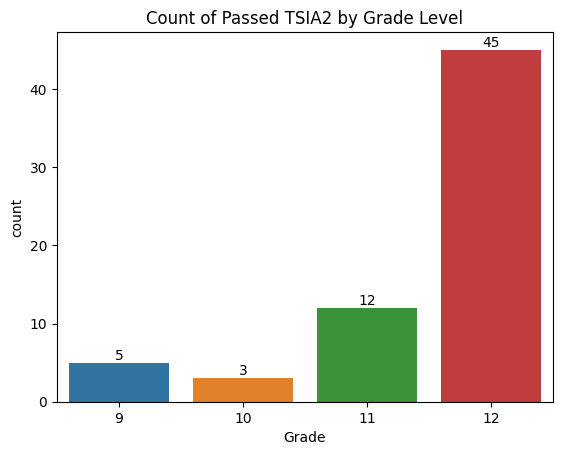

In [ ]:
#Creates bar graph for the the number of scholars who have passed all sections in each grade
passedByGrade = sns.countplot(data=passedAll, x='Grade')

#Titles the bar graph
plt.title('Count of Passed TSIA2 by Grade Level');

#Adds counts to bars
for bar in passedByGrade.containers:
  passedByGrade.bar_label(bar)

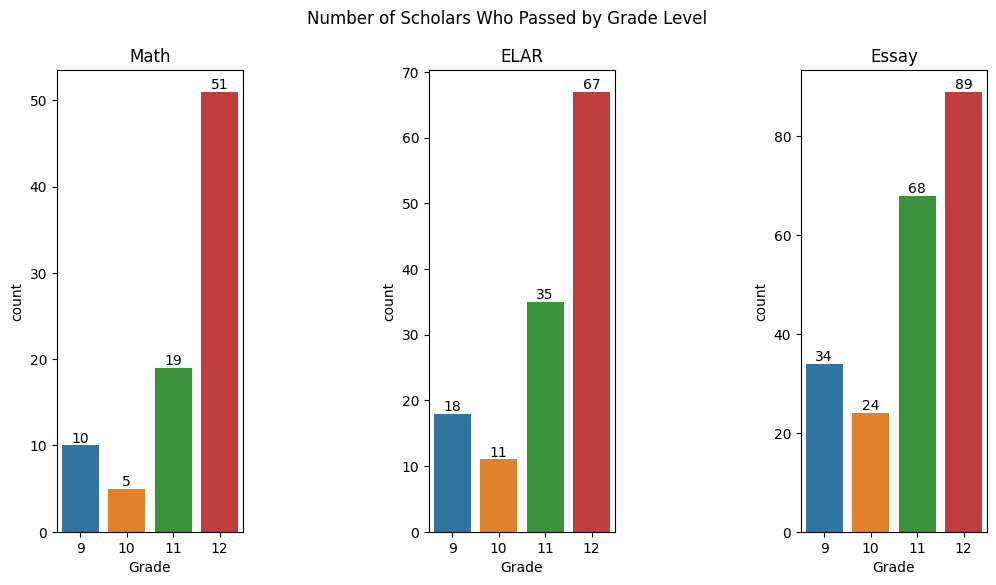

In [ ]:
#Create Plot structure
passedByGradeFig, passedByGradeAx = plt.subplots(1,3, figsize=(12,6))

#Adjust spacing
plt.subplots_adjust(wspace=1)

#Creates Each plot
sns.countplot(data=passedMath, x='Grade', ax=passedByGradeAx[0])
sns.countplot(data=passedELAR, x='Grade', ax=passedByGradeAx[1])
sns.countplot(data=passedEssay, x='Grade', ax=passedByGradeAx[2])

#Titles
passedByGradeFig.suptitle('Number of Scholars Who Passed by Grade Level')
passedByGradeAx[0].set_title('Math')
passedByGradeAx[1].set_title('ELAR')
passedByGradeAx[2].set_title('Essay');

#Labels bars with the Count
for plot in passedByGradeAx:
  for bar in plot.containers:
    plot.bar_label(bar)

**Observations:**
* The senior class has the most passing scores out of all of the grade levels.
* The freshman class has more passing scores than the sophmores.

Now we are going to look the percentage of seniors who have passed all three sections.

In [ ]:
#Count the number of seniors who passed and total seniors
SeniorsPassedCount = len(passedAll.loc[passedAll['Grade']==12])
SeniorCount = len(df.loc[df['Grade']==12])

#Prints percentages
print(f'{round(SeniorsPassedCount/SeniorCount*100,1)}% of Seniors ({SeniorsPassedCount}/{SeniorCount}) have passed all sections of the TSIA2.')

31.2% of Seniors (45/144) have passed all sections of the TSIA2.


Now we will find the number of senior who only need to pass the math section of the TSIA2.

In [ ]:
#dataframe for passedELARAndEssayOnly
dfPassedELARAndEssayOnly = passedELARAndEssay.loc[(passedELARAndEssay['Math'] <950) & (passedELARAndEssay['Math Diagnostic'] < 6)]

seniorNeedMath = len(dfPassedELARAndEssayOnly.loc[dfPassedELARAndEssayOnly['Grade']==12])


print(f'There are {seniorNeedMath} seniors who only need to pass the math test.')

There are 16 seniors who only need to pass the math test.


## 6) Scores Distribution

The goal of this section is see the distrabution for each of the exam scores.  In this section the green area of the graph represents a passing score.

### a) Math Scores Distribution

**Math Scores**

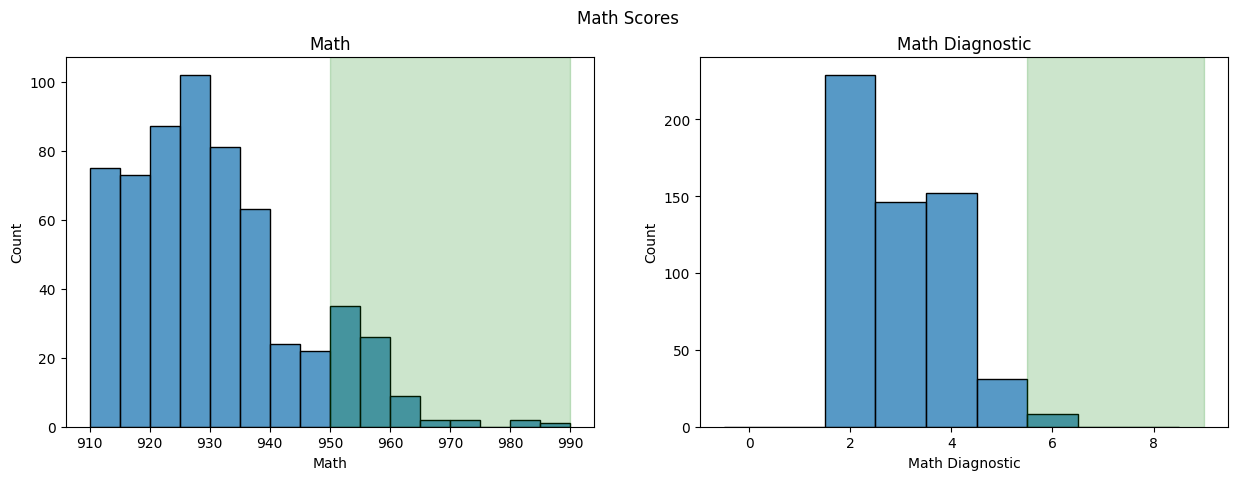

In [ ]:
#Create Subplot Structure for Math and Math Diagnostic
mathScoresFig, mathScoresAx = plt.subplots(1,2)

#Adjust sizing
mathScoresFig.set_figwidth(15)

#Creates Plot for Math
sns.histplot(
    data=df,
    x='Math',
    binwidth=5,
    ax=mathScoresAx[0]
    ).set_xticks(np.arange(910, 991, 10))

#Creates Plot of Math Diagnostic
sns.histplot(
    data=df,
    x='Math Diagnostic',
    binwidth = 1,
    binrange=(-0.5,8.5),
    ax=mathScoresAx[1]
    )

#Titles
mathScoresFig.suptitle('Math Scores')
mathScoresAx[0].set_title('Math')
mathScoresAx[1].set_title('Math Diagnostic')

#Highlights passing scores
mathScoresAx[0].axvspan(950, 990, color = 'green', alpha = 0.2)
mathScoresAx[1].axvspan(5.5, 9, color = 'green', alpha = 0.2);

In [ ]:
#Data for all scholars who faild Math but passed Math Diagnostic
passedMath.loc[passedMath['Math']<950]

,SR ID,TSDS,First,Last,Grade,ELAR,ELAR Diagnostic,ELAR -Text Analysis and Synthesis,ELAR - Content Revision and Editing for Conventions.,Essay,Math,Math Diagnostic,Math - Quantitative Reasoning,Math - Algebraic Reasoning,Math - Geometric and Spatial Reasoning,Math - Probabilistic and Statistical Reasoning
10,11,11,Kasey,Oconnell,12,961.0,NaN,NaN,NaN,5.0,941.0,6.0,2-Proficient,1-Basic,2-Proficient,3-Advanced
38,39,39,Allan,Shields,12,943.0,5.0,3-Advanced,2-Proficient,6.0,944.0,6.0,2-Proficient,1-Basic,2-Proficient,2-Proficient
50,51,51,Jared,Glenn,12,946.0,NaN,NaN,NaN,5.0,949.0,6.0,2-Proficient,2-Proficient,2-Proficient,2-Proficient
52,53,53,Lucian,House,12,946.0,4.0,3-Advanced,2-Proficient,5.0,948.0,6.0,2-Proficient,1-Basic,2-Proficient,2-Proficient
103,104,104,Sulaiman,Bishop,11,960.0,4.0,2-Proficient,3-Advanced,5.0,948.0,6.0,2-Proficient,1-Basic,2-Proficient,3-Advanced
109,110,110,Haleema,Frank,11,960.0,NaN,NaN,NaN,6.0,946.0,6.0,2-Proficient,1-Basic,2-Proficient,2-Proficient
294,295,295,Gabriella,Cabrera,12,965.0,NaN,NaN,NaN,6.0,942.0,6.0,2-Proficient,3-Advanced,2-Proficient,3-Advanced
367,368,368,Krish,Solomon,9,954.0,NaN,NaN,NaN,6.0,949.0,6.0,2-Proficient,2-Proficient,2-Proficient,2-Proficient


**Observations:**
* There are 8 scholars who passed math through the diagnostic test.
* All scholars who passed the diagnostic test scored at least proficient in quantitative reasoning and geometry and statistics.
* 5 out of the 8 scholars scored basic on algebra.

**Math Scores by Grade**

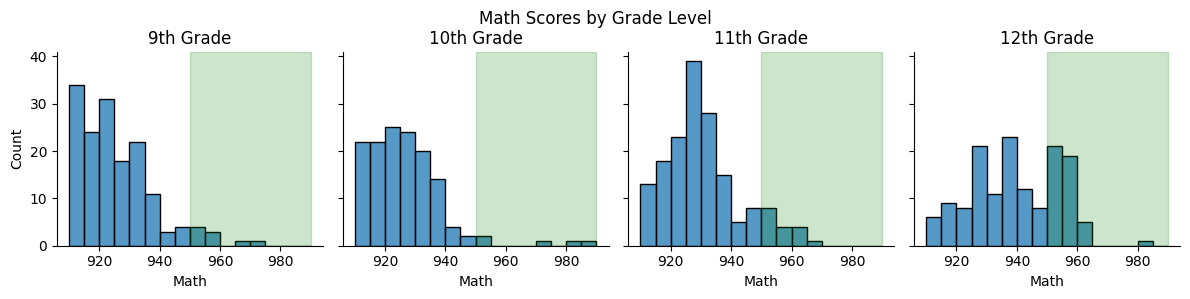

In [ ]:
#Creates plots for each math objective
mathScoresByGrade = sns.FacetGrid(df, col="Grade")

#Creates each plot
mathScoresByGrade.map(sns.histplot, "Math", binwidth = 5, binrange = (910, 990) )

#Fig Title
mathScoresByGrade.fig.suptitle("Math Scores by Grade Level")

#Adjust spacing
plt.subplots_adjust(top=.84)

#Plot Titles
mathScoresByGrade.axes.flatten()[0].set_title("9th Grade")
mathScoresByGrade.axes.flatten()[1].set_title("10th Grade")
mathScoresByGrade.axes.flatten()[2].set_title("11th Grade")
mathScoresByGrade.axes.flatten()[3].set_title("12th Grade");

#Highlights Passing Scores
mathScoresByGrade.axes.flatten()[0].axvspan(950, 990, color = 'green', alpha = 0.2);
mathScoresByGrade.axes.flatten()[1].axvspan(950, 990, color = 'green', alpha = 0.2);
mathScoresByGrade.axes.flatten()[2].axvspan(950, 990, color = 'green', alpha = 0.2);
mathScoresByGrade.axes.flatten()[3].axvspan(950, 990, color = 'green', alpha = 0.2);

### b) ELAR Scores Distabutions

**ELAR Scores**

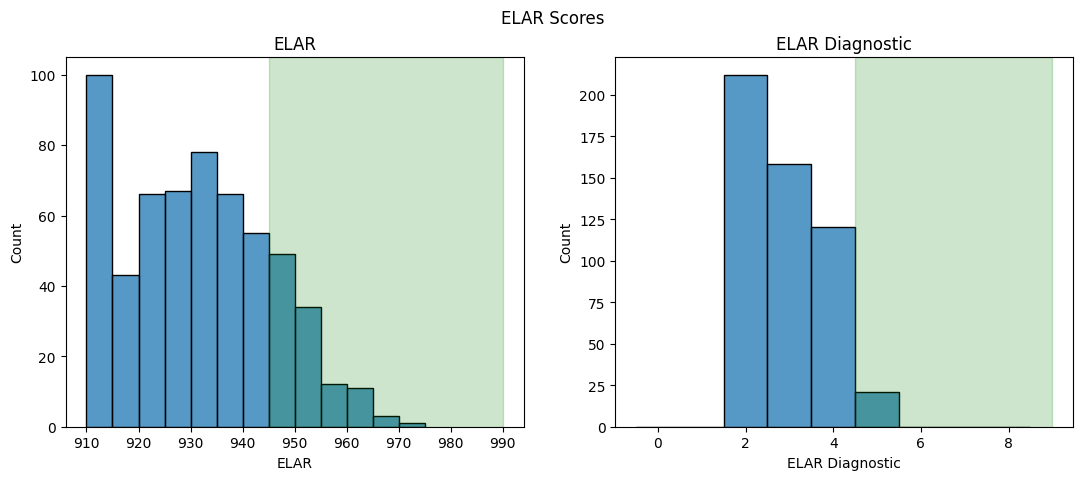

In [ ]:
#Create Subplot Structure for ELAR and ELAR Diagnostic
ELARScoresFig, ELARScoresAx = plt.subplots(1,2)

#Adjust sizing
ELARScoresFig.set_figwidth(13)

#Creates Plot for ELAR
sns.histplot(
    data=df,
    x='ELAR',
    binwidth=5,
    ax=ELARScoresAx[0]
    ).set_xticks(np.arange(910, 991, 10))

#Creates Plot of ELAR Diagnostic
sns.histplot(
    data=df,
    x='ELAR Diagnostic',
    binwidth = 1,
    binrange=(-0.5,8.5),
    ax=ELARScoresAx[1]
    )

#Titles
ELARScoresFig.suptitle('ELAR Scores')
ELARScoresAx[0].set_title('ELAR')
ELARScoresAx[1].set_title('ELAR Diagnostic')

#Highlights passing scores
ELARScoresAx[0].axvspan(945, 990, color = 'green', alpha = 0.2)
ELARScoresAx[1].axvspan(4.5, 9, color = 'green', alpha = 0.2);

In [ ]:
#passed ELAR by Diagnostic test
passedELAR.loc[passedELAR['ELAR']<945]

,SR ID,TSDS,First,Last,Grade,ELAR,ELAR Diagnostic,ELAR -Text Analysis and Synthesis,ELAR - Content Revision and Editing for Conventions.,Essay,Math,Math Diagnostic,Math - Quantitative Reasoning,Math - Algebraic Reasoning,Math - Geometric and Spatial Reasoning,Math - Probabilistic and Statistical Reasoning
2,3,3,Victor,Ingram,12,944.0,5.0,3-Advanced,3-Advanced,5.0,953.0,NaN,NaN,NaN,NaN,NaN
3,4,4,Halima,Cervantes,12,940.0,5.0,3-Advanced,2-Proficient,5.0,950.0,4.0,1-Basic,1-Basic,1-Basic,1-Basic
26,27,27,Leyton,Raymond,12,943.0,5.0,3-Advanced,3-Advanced,5.0,940.0,4.0,2-Proficient,1-Basic,1-Basic,2-Proficient
38,39,39,Allan,Shields,12,943.0,5.0,3-Advanced,2-Proficient,6.0,944.0,6.0,2-Proficient,1-Basic,2-Proficient,2-Proficient
56,57,57,Aarav,Weiss,12,944.0,5.0,3-Advanced,3-Advanced,7.0,953.0,4.0,1-Basic,1-Basic,2-Proficient,2-Proficient
74,75,75,Bilal,Cooke,12,942.0,5.0,3-Advanced,3-Advanced,5.0,957.0,5.0,2-Proficient,2-Proficient,2-Proficient,2-Proficient
76,77,77,Annie,Gibbs,12,944.0,5.0,3-Advanced,2-Proficient,5.0,949.0,5.0,1-Basic,1-Basic,2-Proficient,2-Proficient
85,86,86,Elmer,Spencer,12,936.0,5.0,3-Advanced,3-Advanced,5.0,950.0,NaN,NaN,NaN,NaN,NaN
99,100,100,Sebastien,Vargas,12,940.0,5.0,3-Advanced,3-Advanced,4.0,948.0,4.0,2-Proficient,2-Proficient,2-Proficient,1-Basic
101,102,102,Philip,Lowe,12,941.0,5.0,3-Advanced,3-Advanced,6.0,957.0,NaN,NaN,NaN,NaN,NaN


**Observations:**
* There are 21 scholars who passed ELAR by the diagnostic test.
* Most of the scores on the objective are Advance with a few at Proficient.
* There are no scores of Basic.

**ELAR Scores by Grade**

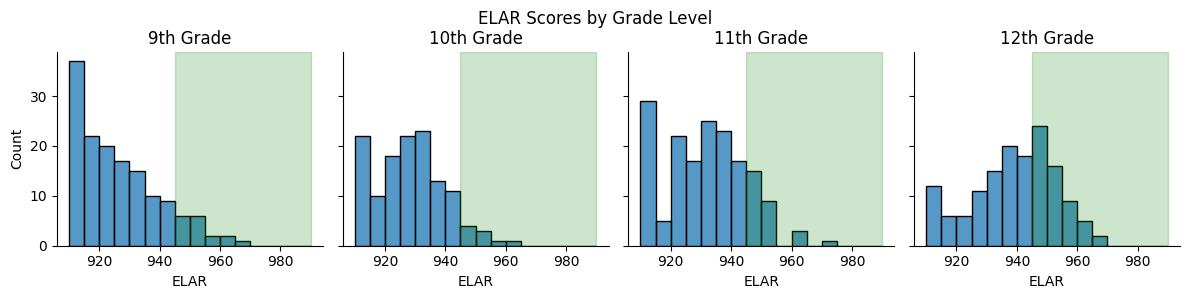

In [ ]:
#Creates a Grid for ELAR Scores
ELARScoresByGrade = sns.FacetGrid(df, col="Grade")

#Creates Plots
ELARScoresByGrade.map(
    sns.histplot, "ELAR",
    binwidth = 5,
    binrange = (910, 990) )

#Titles Figure
ELARScoresByGrade.fig.suptitle("ELAR Scores by Grade Level")

#Adjust size
plt.subplots_adjust(top=.84)

#Titles plots
ELARScoresByGrade.axes.flatten()[0].set_title("9th Grade")
ELARScoresByGrade.axes.flatten()[1].set_title("10th Grade")
ELARScoresByGrade.axes.flatten()[2].set_title("11th Grade")
ELARScoresByGrade.axes.flatten()[3].set_title("12th Grade")

#Highlight passing scores
ELARScoresByGrade.axes.flatten()[0].axvspan(945, 990, color = 'green', alpha = 0.2)
ELARScoresByGrade.axes.flatten()[1].axvspan(945, 990, color = 'green', alpha = 0.2)
ELARScoresByGrade.axes.flatten()[2].axvspan(945, 990, color = 'green', alpha = 0.2)
ELARScoresByGrade.axes.flatten()[3].axvspan(945, 990, color = 'green', alpha = 0.2);

### c) Essay Scores Distrabutions

**Essay Score**

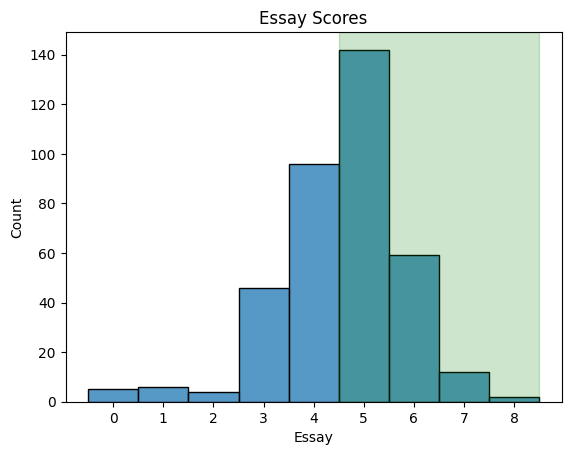

In [ ]:
#Essay Scores for everyone, Green area is a passing score.
sns.histplot(
    data=df,
    x='Essay',
    binwidth=1,
    binrange=(-.5, 8.5)
      ).set_xticks(np.arange(0, 9))

#Titles Plot
plt.title("Essay Scores")

#Highlights Passing Scores
plt.axvspan(4.5, 8.5, color = 'green', alpha = 0.2);

**Essay Score by Grade**

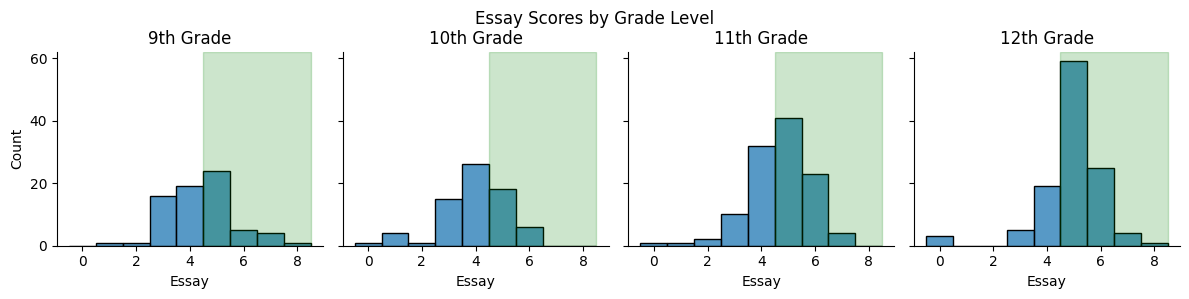

In [ ]:
#Creates Grid for Essay Scores by Grade
essayScoresByGrade = sns.FacetGrid(df, col="Grade")

#Creates Plots
essayScoresByGrade.map(
    sns.histplot, "Essay",
    binwidth = 1,
    binrange = (-.5, 8.5))

#Titles Figure
essayScoresByGrade.fig.suptitle("Essay Scores by Grade Level")

#Adjust sizing
plt.subplots_adjust(top=.84)

#Labels Plots
essayScoresByGrade.axes.flatten()[0].set_title("9th Grade")
essayScoresByGrade.axes.flatten()[1].set_title("10th Grade")
essayScoresByGrade.axes.flatten()[2].set_title("11th Grade")
essayScoresByGrade.axes.flatten()[3].set_title("12th Grade");

#Highlight Passing Scores
essayScoresByGrade.axes.flatten()[0].axvspan(4.5, 8.5, color = 'green', alpha = 0.2);
essayScoresByGrade.axes.flatten()[1].axvspan(4.5, 8.5, color = 'green', alpha = 0.2);
essayScoresByGrade.axes.flatten()[2].axvspan(4.5, 8.5, color = 'green', alpha = 0.2);
essayScoresByGrade.axes.flatten()[3].axvspan(4.5, 8.5, color = 'green', alpha = 0.2);

## 7) Scores by Objective

The goal for this section is to explore how scholars preformed on each individual area within the diagnostic tests.

### a) Math Objective Scores




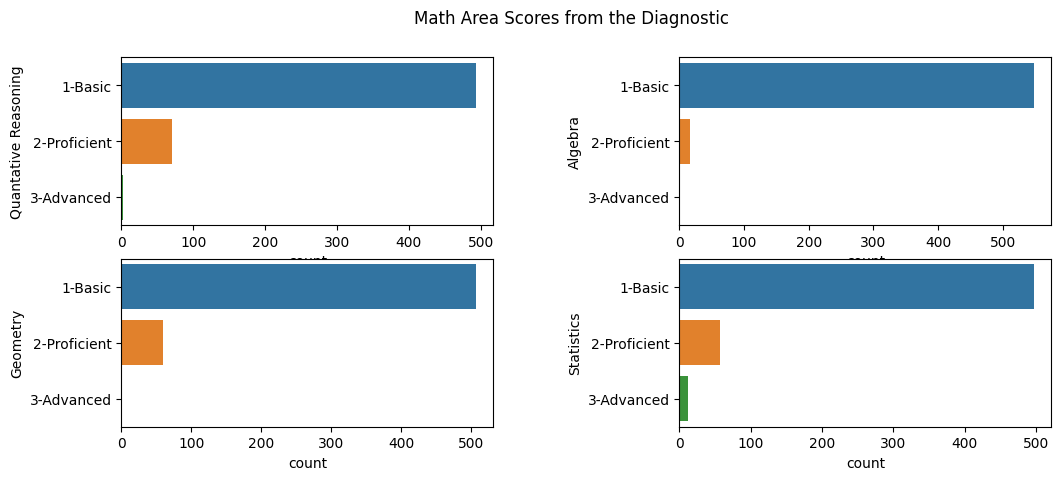

In [ ]:
#Creates Grid for Math Areas
mathObjectiveFig, mathObjectiveAx = plt.subplots(2, 2)

#Adjust Sizing
mathObjectiveFig.set_figwidth(12)
mathObjectiveFig.subplots_adjust(wspace=.5)

#Creates Plots
sns.countplot(data=df, y='Math - Quantitative Reasoning', ax=mathObjectiveAx[0, 0], order = ['1-Basic', '2-Proficient', '3-Advanced'])
sns.countplot(data=df, y='Math - Algebraic Reasoning', ax=mathObjectiveAx[0, 1], order = ['1-Basic', '2-Proficient', '3-Advanced'])
sns.countplot(data=df, y='Math - Geometric and Spatial Reasoning', ax=mathObjectiveAx[1, 0], order = ['1-Basic', '2-Proficient', '3-Advanced'])
sns.countplot(data=df, y='Math - Probabilistic and Statistical Reasoning', ax=mathObjectiveAx[1, 1], order = ['1-Basic', '2-Proficient', '3-Advanced'])

#Titles Figure
mathObjectiveFig.suptitle('Math Area Scores from the Diagnostic')

#Titles Plots
mathObjectiveAx[0,0].set_ylabel('Quantative Reasoning')
mathObjectiveAx[0,1].set_ylabel('Algebra')
mathObjectiveAx[1,0].set_ylabel('Geometry')
mathObjectiveAx[1,1].set_ylabel('Statistics');


**Observations**
* All objectives have the vast majority of students scoring '1-Basic'.
* Quantative Reasoning and Statistics are the only objectives with at least one scholar scoring '3-Advance'.
* Algebra has the lowest count for scores of '2-Proficient'.

In order to rank these objectives, we are going to focus on the percentage of scholars who scored a '1-Basic' on each area.

In [ ]:
#Percent of Basic Score on each area
mathDiagnosticCount = len(df['Math Diagnostic'].dropna())

#Percent of Basic score on Quantitative Reasoning
QuantitativeBasicPercent = round(100*len(df.loc[df['Math - Quantitative Reasoning']=='1-Basic'])/mathDiagnosticCount,1)

#Percent of Basic on Algebra
AlgebraBasicPercent = round(100*len(df.loc[df['Math - Algebraic Reasoning']=='1-Basic'])/mathDiagnosticCount,1)

#Percent of Basic on Geometry
GeometryBasicPercent = round(100*len(df.loc[df['Math - Geometric and Spatial Reasoning']=='1-Basic'])/mathDiagnosticCount,1)

#Percent of Basic on Stats
StatsBasicPercent = round(100*len(df.loc[df['Math - Probabilistic and Statistical Reasoning']=='1-Basic'])/mathDiagnosticCount,1)

#Prints Basic Percentages
print(f'The percentage of scholars that scored basic on quantitative reasoning is {QuantitativeBasicPercent}%.')
print(f'The percentage of scholars that scored basic on algebra is {AlgebraBasicPercent}%.')
print(f'The percentage of scholars that scored basic on geometry is {GeometryBasicPercent}%.')
print(f'The percentage of scholars that scored basic on statistics is {StatsBasicPercent}%.')

The percentage of scholars that scored basic on quantitative reasoning is 87.1%.
The percentage of scholars that scored basic on algebra is 96.8%.
The percentage of scholars that scored basic on geometry is 89.4%.
The percentage of scholars that scored basic on statistics is 87.8%.


### b) ELAR Objective Score

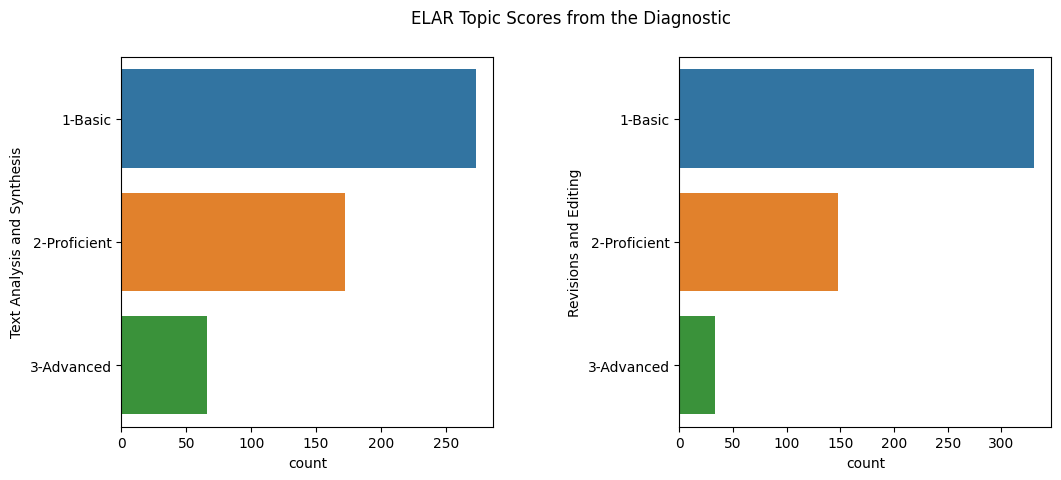

In [ ]:
#Creates Grid for ELAR Diagnostic Areas
ELARObjectivesFig, ELARObjectiveAx = plt.subplots(1, 2)

#Adjust Sizing
ELARObjectivesFig.set_figwidth(12)
ELARObjectivesFig.subplots_adjust(wspace=.5)

#Creates Plots
sns.countplot(
    data=df,
    y='ELAR -Text Analysis and Synthesis',
    ax=ELARObjectiveAx[0],
    order = ['1-Basic', '2-Proficient', '3-Advanced'])
sns.countplot(
    data=df,
    y='ELAR - Content Revision and Editing for Conventions.',
    ax=ELARObjectiveAx[1],
    order = ['1-Basic', '2-Proficient', '3-Advanced'])

#Titles Figure
ELARObjectivesFig.suptitle('ELAR Topic Scores from the Diagnostic')

#Labels Plots
ELARObjectiveAx[0].set_ylabel('Text Analysis and Synthesis')
ELARObjectiveAx[1].set_ylabel('Revisions and Editing');

In order to rank these objectives, we are going to focus on the percentage of scholars who scored a '1-Basic' on each area.

In [ ]:
#Percent of Basic Score on each area
ELARDiagnosticCount = len(df['ELAR Diagnostic'].dropna())

#Percent of Basic score on Analysis Reasoning
AnalysisBasicPercent = round(100*len(df.loc[df['ELAR -Text Analysis and Synthesis']=='1-Basic'])/ELARDiagnosticCount,1)

#Percent of Basic on Algebra
RevisionBasicPercent = round(100*len(df.loc[df['ELAR - Content Revision and Editing for Conventions.']=='1-Basic'])/ELARDiagnosticCount,1)

#Prints Basic Percentages
print(f'The percentage of scholars that scored basic on Text Analysis is {AnalysisBasicPercent}%.')
print(f'The percentage of scholars that scored basic on algebra is {RevisionBasicPercent}%.')

The percentage of scholars that scored basic on Text Analysis is 53.4%.
The percentage of scholars that scored basic on algebra is 64.6%.


## 8) Conclusion and Reccomendations

### Conclusion

---

Our mission at Austin Achieve Public School is to prepare our scholars "to attend and excel at top universities." An important part of this is making sure that our scholars are ready for college level courses which the TSIA2 is designed to determine if the scholars are "college-ready." According to our current TSIA2 data, only 31.2% (45/144) of our seniors have passed the TSIA2.  There are 16 seniors who only need to pass the math section to be considered college-ready.  Our student are struggling the most with the math sections and are doing the best on the Essay section; howerver, there are 243 missing essay scores from all of the grade levels.

### Recommendations

---
 * The 42 scholars who are only need to pass math should take a math workshop in College Seminar and retake the Math exam
 * The seniors and juniors who are missing an Essay score should retake the essay section.
 * Scholars should test in shorter periods.  Only completed one test at a time.  Scholars who pass the first multible choice exam should be excused to a studyhall (This should increase the scores on the diagnostic).
 * We need an indepth look at our current math cirrculumn to see why it is not preparing scholars to become college ready.
 * We need a system to ensure that scholars are completing the essays.

In [ ]:
!jupyter nbconvert --to html TSIA2_AnalysisShareable.ipynb

[NbConvertApp] Converting notebook TSIA2_AnalysisShareable.ipynb to html
[NbConvertApp] Writing 1345530 bytes to TSIA2_AnalysisShareable.html
